In [48]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test Field 

Goal is to modify coupling strengths so that bursting in E and I population vanishes.

* Bursting of Exc pop is reduced if J_itoe is increased
* Bursting of Inh pop is reduced if J_itoi is increased


**Challenge:**

* Increased noise strengths must still lead to synchronization!


In [49]:
params = {
  "runtime": 400.0,

  "J_itoi": 3.0,
  "J_etoe": 0.2,
  "J_etoi": 0.5,
  "J_itoe": 10.0,
    
  "J_ppee": 1.0,
  "J_ppei": 0.6,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 10.0,
  "poisson_p": 0.84,
  "poisson_size": 800,
  "poisson_mean_input": 250,

   "const_delay": 0.2,
   "N_pop": 2
}

In [50]:
params_mid = dict(params)
params_mid["poisson_variance"] = 1.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 62500.0 - single neuron 78.125
Poisson strength: 0.004
Net 2 - rate for single neuron 65.625
(pid=83720) Initializing net ...
(pid=83720) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=83720) Poisson strength: 0.0016666666666666668
(pid=83714) Initializing net ...
(pid=83714) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=83714) Poisson strength: 0.006666666666666667
(pid=83724) Initializing net ...
(pid=83724) Net 1 - poisson rate 60000.0 - single neuron 75.0
(pid=83724) Poisson strength: 0.01
(pid=83723) Initializing net ...
(pid=83715) Initializing net ...
(pid=83715) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=83715) Poisson strength: 0.008333333333333333
(pid=83716) Initializing net ...
(pid=83716) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=83716) Poisson strength: 0.006666666666666667
(pid=83718) Initializing net ...
(pid=83718) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=83718) Pois

(pid=83725) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83722) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83718) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83714) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83723) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83715) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83717) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83716) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83724) Starting simulation at t=0. s for a duration of 0.4 s


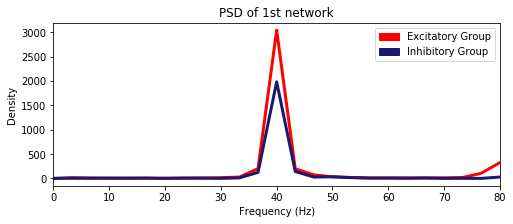

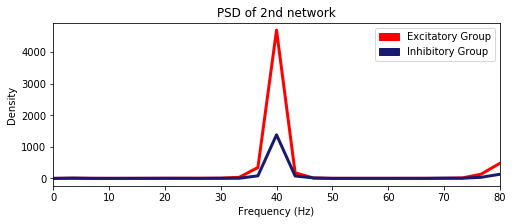

(pid=83719) Starting simulation at t=0. s for a duration of 0.4 s

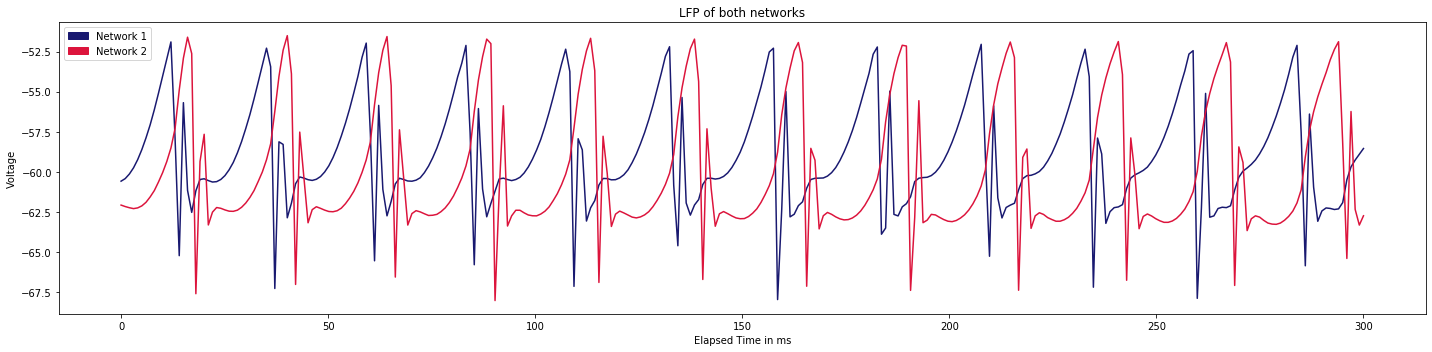

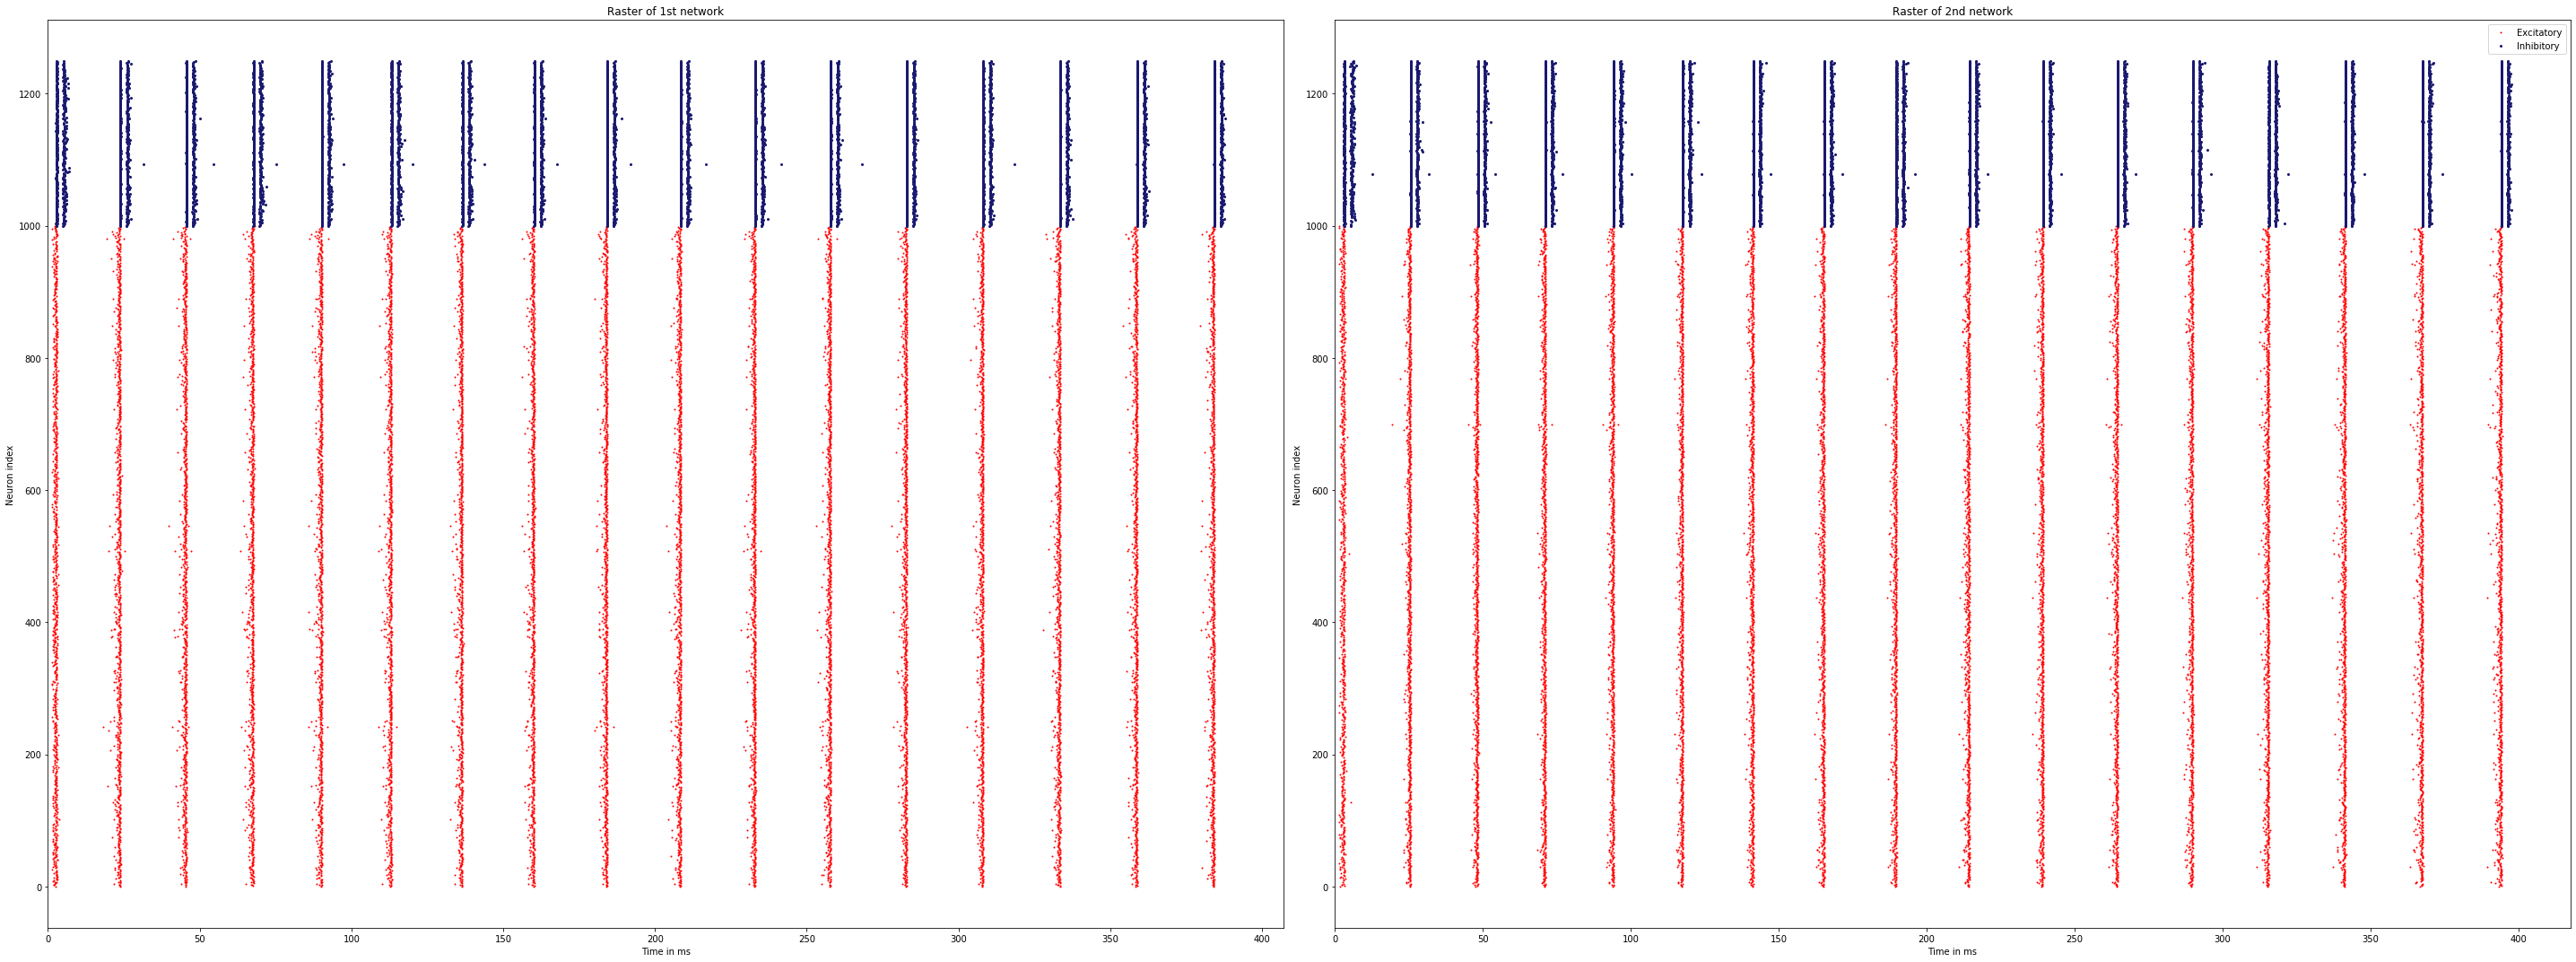

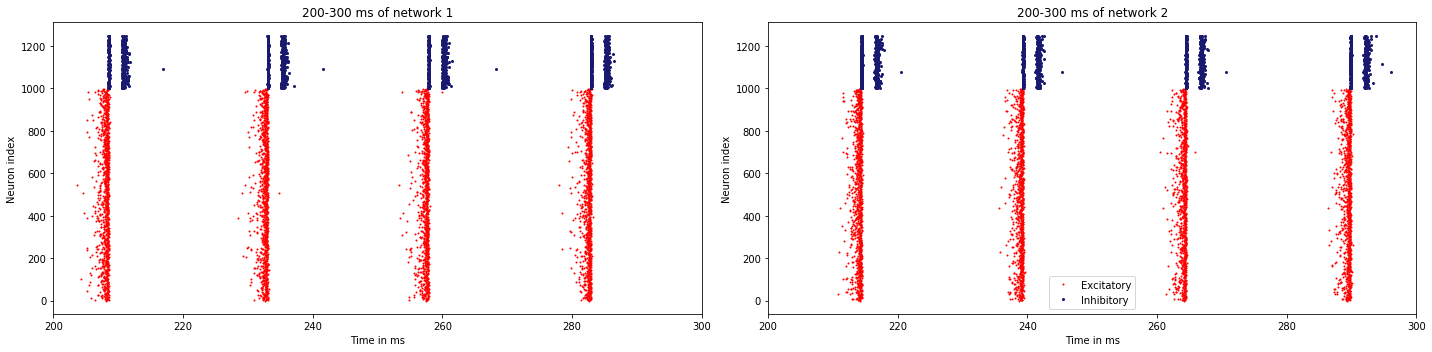

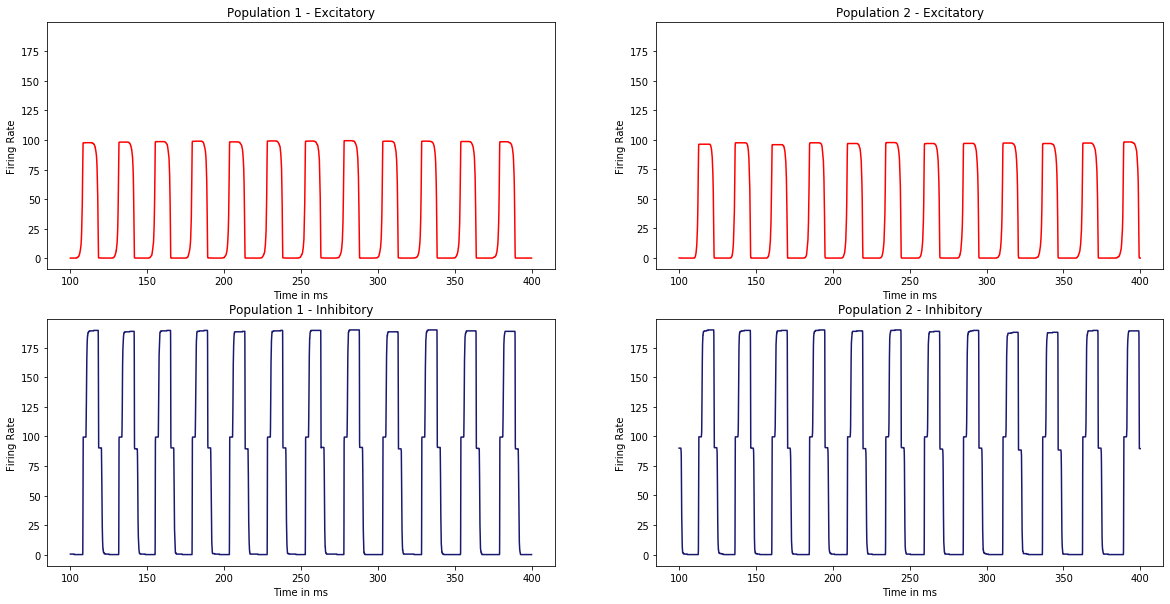

(pid=83720) 0.4 s (100%) simulated in 9s
(pid=83720) ==== Network Run Finished ====
(pid=83720) runtime: 11.0
(pid=83721) 0.39545 s (98%) simulated in 10s, estimated < 1s remaining.
(pid=83721) 0.4 s (100%) simulated in 10s
(pid=83721) ==== Network Run Finished ====
(pid=83721) runtime: 27.0
(pid=83721) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=83725) 0.38865 s (97%) simulated in 10s, estimated < 1s remaining.
(pid=83725) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=83725) 0.4 s (100%) simulated in 10s
(pid=83725) ==== Network Run Finished ====
(pid=83725) runtime: 27.8
(pid=83722) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=83722) 0.4 s (100%) simulated in 9s
(pid=83722) ==== Network Run Finished ====
(pid=83722) runtime: 27.9
(pid=83718) 0.4 s (100%) simulated in 9s
(pid=83718) ==== Network Run Finished ====
(pid=8371

In [51]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

In [5]:
params_mid = dict(params)
params_mid["poisson_variance"] = 4.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 15625.0 - single neuron 19.53125
Poisson strength: 0.016
Net 2 - rate for single neuron 16.40625
Initialization time: 0.6617109775543213s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.6 s
0.6 s (100%) simulated in 5s
==== Network Run Finished ====
runtime: 9.5


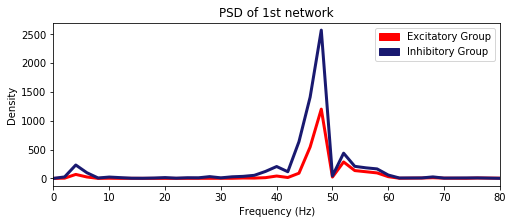

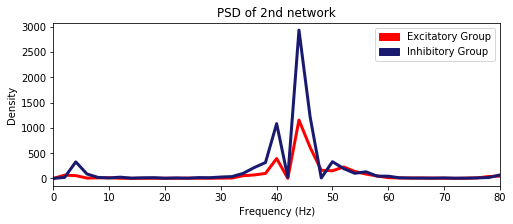

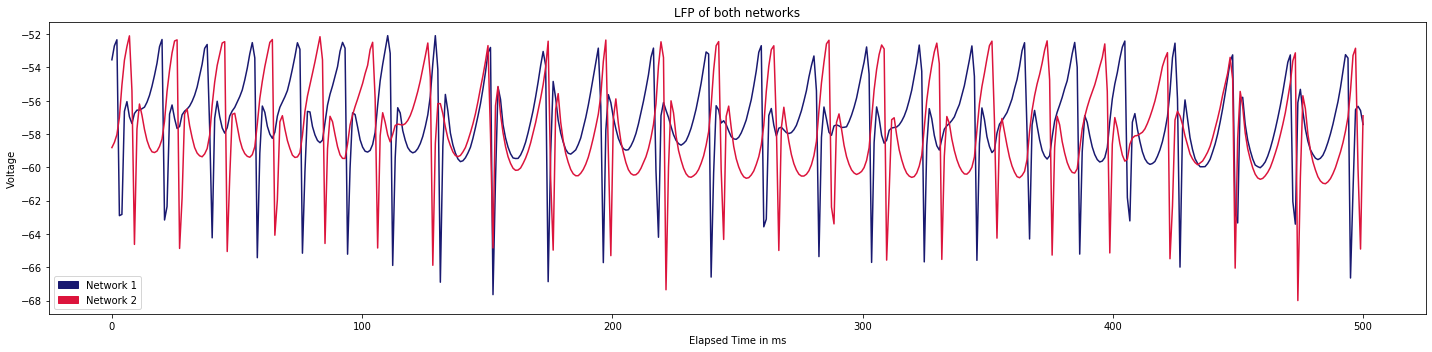

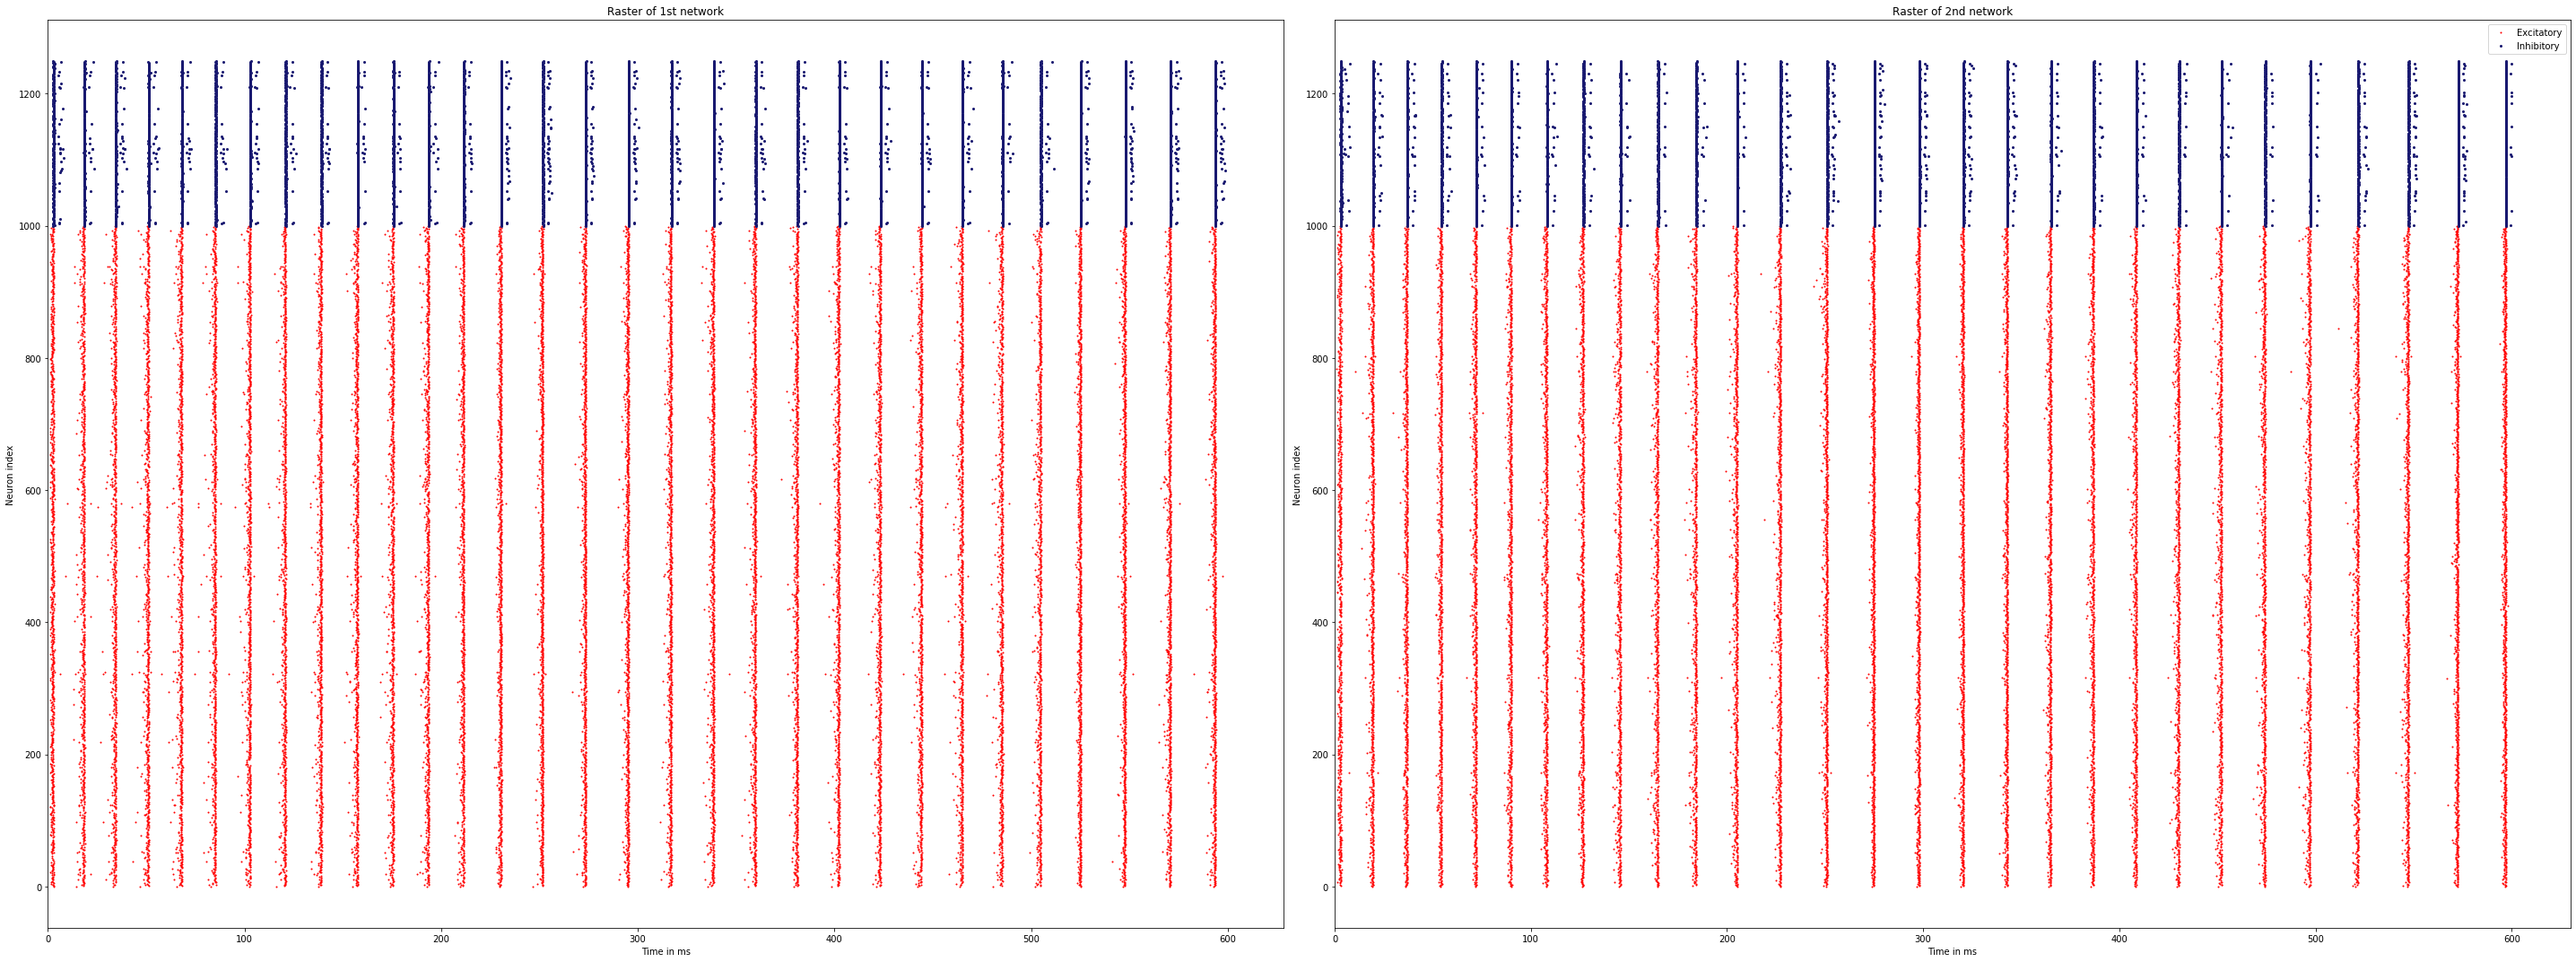

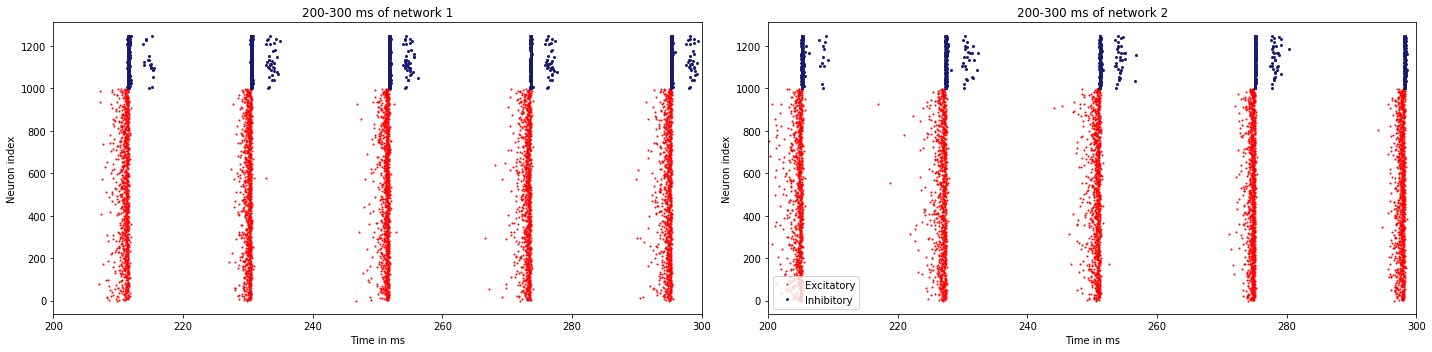

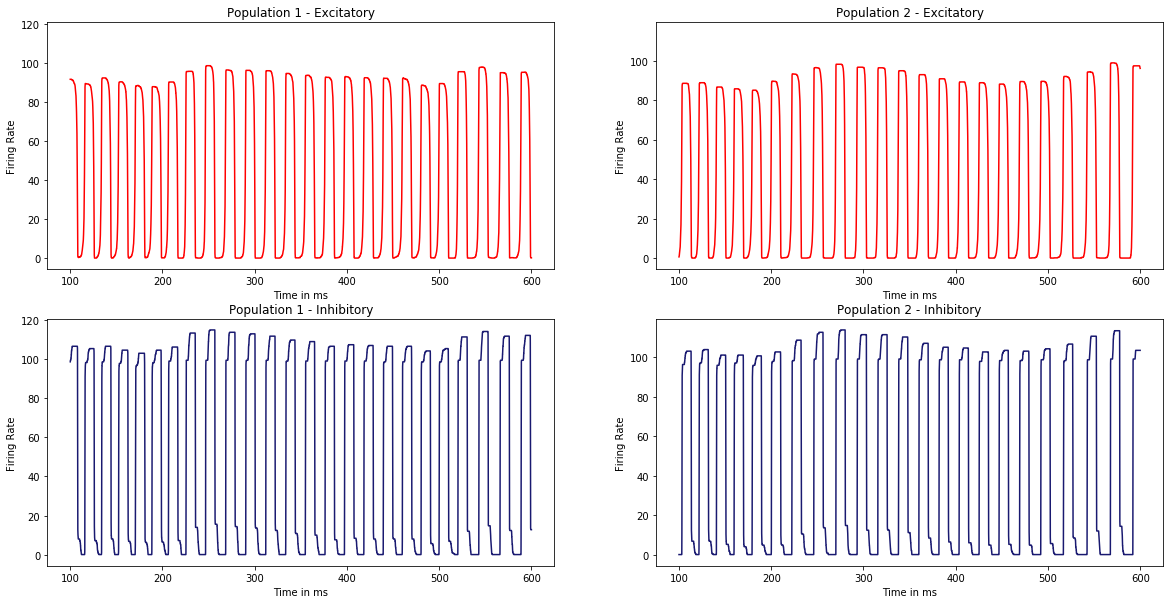

In [6]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

# Explorations

In [7]:
RUN = True

exp_params = {
  "poisson_variance": np.arange(1.0, 10.0, .5),
}

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=params,
    hdf_filename=constants.MODELS_PATH + "/2_nets_uncorr_synch_noise_strength_exploration.h5",
    exploration_name="1"
)

if RUN:
    ex.run()
    
ex.load_results(all=True)

2020-07-03 14:27:07,591	INFO resource_spec.py:212 -- Starting Ray with 10.74 GiB memory available for workers and up to 5.39 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-03 14:27:07,929	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
100%|██████████| 18/18 [00:00<00:00, 1119.82it/s]
WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '1'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
 [py.warnings]
  check_attribute_name(name)

  0%|          | 0/18 [00:00<?, ?it/s]

(pid=68854) Initializing net ...
(pid=68854) Net 1 - poisson rate 62500.0 - single neuron 78.125
(pid=68854) Poisson strength: 0.004
(pid=68856) Initializing net ...
(pid=68856) Net 1 - poisson rate 25000.0 - single neuron 31.25
(pid=68856) Poisson strength: 0.01
(pid=68859) Initializing net ...
(pid=68859) Net 1 - poisson rate 15625.0 - single neuron 19.53125
(pid=68859) Poisson strength: 0.016
(pid=68860) Initializing net ...
(pid=68860) Net 1 - poisson rate 13888.88888888889 - single neuron 17.361111111111114
(pid=68860) Poisson strength: 0.018
(pid=68863) Initializing net ...
(pid=68863) Net 1 - poisson rate 9615.384615384615 - single neuron 12.019230769230768
(pid=68863) Poisson strength: 0.026
(pid=68862) Initializing net ...
(pid=68862) Net 1 - poisson rate 10416.666666666666 - single neuron 13.020833333333332
(pid=68862) Poisson strength: 0.024
(pid=68857) Initializing net ...
(pid=68857) Net 1 - poisson rate 11363.636363636364 - single neuron 14.204545454545455
(pid=68857) Poi

  6%|▌         | 1/18 [00:58<16:31, 58.31s/it]

(pid=68853) 0.6 s (100%) simulated in 19s
(pid=68853) ==== Network Run Finished ====
(pid=68853) runtime: 48.9
(pid=68853) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=68854) Initializing net ...
(pid=68854) Net 1 - poisson rate 8928.571428571428 - single neuron 11.160714285714285
(pid=68854) Poisson strength: 0.028
(pid=68861) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=68861) 0.6 s (100%) simulated in 19s
(pid=68861) ==== Network Run Finished ====
(pid=68861) runtime: 49.1
(pid=68862) 0.6 s (100%) simulated in 19s
(pid=68862) ==== Network Run Finished ====
(pid=68862) runtime: 49.9
(pid=68862) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=68854) Net 2 - rate for single neuron 9.374999999999998
(pid=68855) 0.5896 s (98%) simulated in 20s, estimated < 1s remaining.
(pid=68855) 0.6 s (100%) simulated in 20s
(pid=68855) ==== 

 56%|█████▌    | 10/18 [01:14<00:22,  2.78s/it]

(pid=68873) Initializing net ...
(pid=68873) Net 1 - poisson rate 8333.333333333334 - single neuron 10.416666666666668
(pid=68873) Poisson strength: 0.03
(pid=68859) Starting simulation at t=0. s for a duration of 0.6 s


 61%|██████    | 11/18 [01:14<00:13,  2.00s/it]

(pid=68854) Starting simulation at t=0. s for a duration of 0.6 s


 67%|██████▋   | 12/18 [01:15<00:08,  1.45s/it]

(pid=68873) Net 2 - rate for single neuron 8.75
(pid=68873) Initialization time: 1.4210600852966309s
(pid=68873) ==== Running Network ... ====
(pid=68853) Starting simulation at t=0. s for a duration of 0.6 s
(pid=68861) Starting simulation at t=0. s for a duration of 0.6 s
(pid=68862) Starting simulation at t=0. s for a duration of 0.6 s
(pid=68859) 0.53155 s (88%) simulated in 10s, estimated 1s remaining.
(pid=68854) 0.5373 s (89%) simulated in 10s, estimated 1s remaining.
(pid=68859) 0.6 s (100%) simulated in 11s
(pid=68859) ==== Network Run Finished ====
(pid=68859) runtime: 17.6
(pid=68854) 0.6 s (100%) simulated in 11s
(pid=68854) ==== Network Run Finished ====
(pid=68854) runtime: 24.5
(pid=68853) 0.55 s (91%) simulated in 10s, estimated 1s remaining.
(pid=68861) 0.54625 s (91%) simulated in 10s, estimated 1s remaining.


 72%|███████▏  | 13/18 [01:29<00:27,  5.41s/it]

(pid=68862) 0.5492 s (91%) simulated in 10s, estimated 1s remaining.
(pid=68853) 0.6 s (100%) simulated in 10s
(pid=68853) ==== Network Run Finished ====
(pid=68853) runtime: 19.1
(pid=68861) 0.6 s (100%) simulated in 10s
(pid=68861) ==== Network Run Finished ====
(pid=68861) runtime: 19.2
(pid=68862) 0.6 s (100%) simulated in 10s
(pid=68862) ==== Network Run Finished ====
(pid=68862) runtime: 18.7
(pid=68873) Starting simulation at t=0. s for a duration of 0.6 s
(pid=68873) 0.6 s (100%) simulated in 6s
(pid=68873) ==== Network Run Finished ====
(pid=68873) runtime: 26.1
(pid=68873) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


100%|██████████| 18/18 [00:02<00:00,  7.87it/s]


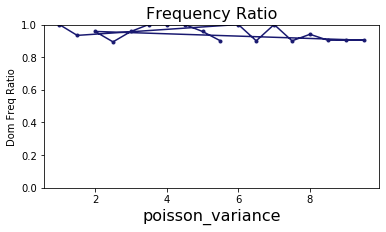

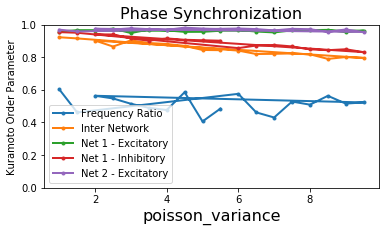

In [8]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None , vmax_phase=None)

In [52]:
exp_params = {
  "poisson_variance": np.arange(1.0, 16.0, 1.0),
  "poisson_p": [0.6, 0.84],
}

ov_params = dict(params)
ov_params.update({
      "J_itoi": 3.0,
      "J_etoe": 0.6,
      "J_etoi": 3.2,
      "J_itoe": 7.0,
    
      "J_ppee": 0.6,
      "J_ppei": 0.6,
    
      "poisson_mean_input": 600,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/2_nets_uncorr_synch_noise_strength_exploration.h5",
    exploration_name="run_9"
)

(pid=83731) Initializing net ...
(pid=83731) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=83731) Poisson strength: 0.013333333333333334
(pid=83731) Net 2 - rate for single neuron 33.75


In [53]:
ex.run()

(pid=83718) Starting simulation at t=0. s for a duration of 0.4 s
(pid=83726) Initializing net ...
(pid=83726) Net 1 - poisson rate 40000.0 - single neuron 50.0
(pid=83726) Poisson strength: 0.015


2020-07-03 16:18:57,835	INFO resource_spec.py:212 -- Starting Ray with 10.84 GiB memory available for workers and up to 5.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-03 16:18:58,108	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/30 [00:00<?, ?it/s]

(pid=84066) Initializing net ...
(pid=84066) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=84066) Poisson strength: 0.0016666666666666668
(pid=84061) Initializing net ...
(pid=84061) Net 1 - poisson rate 180000.0 - single neuron 225.0
(pid=84061) Poisson strength: 0.0033333333333333335
(pid=84065) Initializing net ...
(pid=84065) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=84065) Poisson strength: 0.006666666666666667
(pid=84064) Initializing net ...
(pid=84064) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=84064) Poisson strength: 0.0016666666666666668
(pid=84062) Initializing net ...
(pid=84062) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=84062) Poisson strength: 0.005
(pid=84067) Initializing net ...
(pid=84067) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=84067) Poisson strength: 0.005
(pid=84068) Initializing net ...
(pid=84068) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=84068) Poisson strength: 0.0083333333333

  7%|▋         | 2/30 [00:44<14:24, 30.87s/it]

(pid=84069) Initializing net ...
(pid=84069) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=84069) Poisson strength: 0.018333333333333333
(pid=84064) Initializing net ...
(pid=84064) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=84064) Poisson strength: 0.02
(pid=84070) Initialization time: 1.8667850494384766s


 10%|█         | 3/30 [00:44<09:45, 21.67s/it]

(pid=84070) ==== Running Network ... ====


 13%|█▎        | 4/30 [00:44<06:35, 15.23s/it]

(pid=84063) Initialization time: 1.8627710342407227s
(pid=84069) Net 2 - rate for single neuron 34.36363636363636
(pid=84063) ==== Running Network ... ====
(pid=84064) Net 2 - rate for single neuron 22.5


 17%|█▋        | 5/30 [00:44<04:28, 10.72s/it]

(pid=84071) Initializing net ...
(pid=84071) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=84071) Poisson strength: 0.021666666666666667
(pid=84068) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84071) Net 2 - rate for single neuron 20.769230769230766
(pid=84070) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84069) Initialization time: 1.9752540588378906s
(pid=84064) Initialization time: 1.9814980030059814s
(pid=84069) ==== Running Network ... ====
(pid=84064) ==== Running Network ... ====
(pid=84063) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84071) Initialization time: 2.0527029037475586s
(pid=84071) ==== Running Network ... ====


 20%|██        | 6/30 [00:47<03:21,  8.39s/it]

(pid=84069) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84064) Starting simulation at t=0. s for a duration of 0.4 s


 23%|██▎       | 7/30 [00:47<02:16,  5.94s/it]

(pid=84067) Initializing net ...
(pid=84067) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=84067) Poisson strength: 0.021666666666666667


 33%|███▎      | 10/30 [00:48<00:43,  2.19s/it]

(pid=84067) Net 2 - rate for single neuron 29.076923076923073


 47%|████▋     | 14/30 [00:49<00:11,  1.41it/s]

(pid=84067) Initialization time: 2.1253790855407715s
(pid=84067) ==== Running Network ... ====
(pid=84088) Initializing net ...
(pid=84088) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=84088) Poisson strength: 0.018333333333333333
(pid=84088) Net 2 - rate for single neuron 24.545454545454543
(pid=84066) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84061) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84083) Initializing net ...
(pid=84083) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=84083) Poisson strength: 0.02
(pid=84068) 273.2 ms (68%) simulated in 10s, estimated 5s remaining.
(pid=84083) Net 2 - rate for single neuron 31.5
(pid=84072) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84088) Initialization time: 2.3983330726623535s
(pid=84088) ==== Running Network ... ====
(pid=84070) 271.85 ms (67%) simulated in 10s, estimated 5s remaining.
(pid=84063) 264.45 ms (66%) simulated in 10s, estimated 5s rema

 50%|█████     | 15/30 [01:14<02:01,  8.07s/it]

(pid=84068) Starting simulation at t=0. s for a duration of 0.4 s


 57%|█████▋    | 17/30 [01:15<00:55,  4.23s/it]

(pid=84067) 0.4 s (100%) simulated in 13s
(pid=84067) ==== Network Run Finished ====
(pid=84067) runtime: 25.7


 67%|██████▋   | 20/30 [01:16<00:15,  1.60s/it]

(pid=84088) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84070) 0.39265 s (98%) simulated in 10s, estimated < 1s remaining.
(pid=84070) 0.4 s (100%) simulated in 10s
(pid=84070) ==== Network Run Finished ====
(pid=84070) runtime: 11.7
(pid=84063) 0.4 s (100%) simulated in 9s
(pid=84063) ==== Network Run Finished ====
(pid=84063) runtime: 11.3
(pid=84069) 0.4 s (100%) simulated in 9s
(pid=84069) ==== Network Run Finished ====
(pid=84069) runtime: 10.6
(pid=84068) 0.4 s (100%) simulated in 8s
(pid=84068) ==== Network Run Finished ====
(pid=84068) runtime: 14.3
(pid=84083) Starting simulation at t=0. s for a duration of 0.4 s
(pid=84088) 0.4 s (100%) simulated in 6s
(pid=84088) ==== Network Run Finished ====
(pid=84088) runtime: 31.6
(pid=84088) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


 73%|███████▎  | 22/30 [01:30<00:29,  3.64s/it]

(pid=84083) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=84083) 0.4 s (100%) simulated in 5s
(pid=84083) ==== Network Run Finished ====
(pid=84083) runtime: 32.9


100%|██████████| 30/30 [01:33<00:00,  3.10s/it]


In [54]:
ex.load_results(all=True)

100%|██████████| 30/30 [00:03<00:00,  9.45it/s]


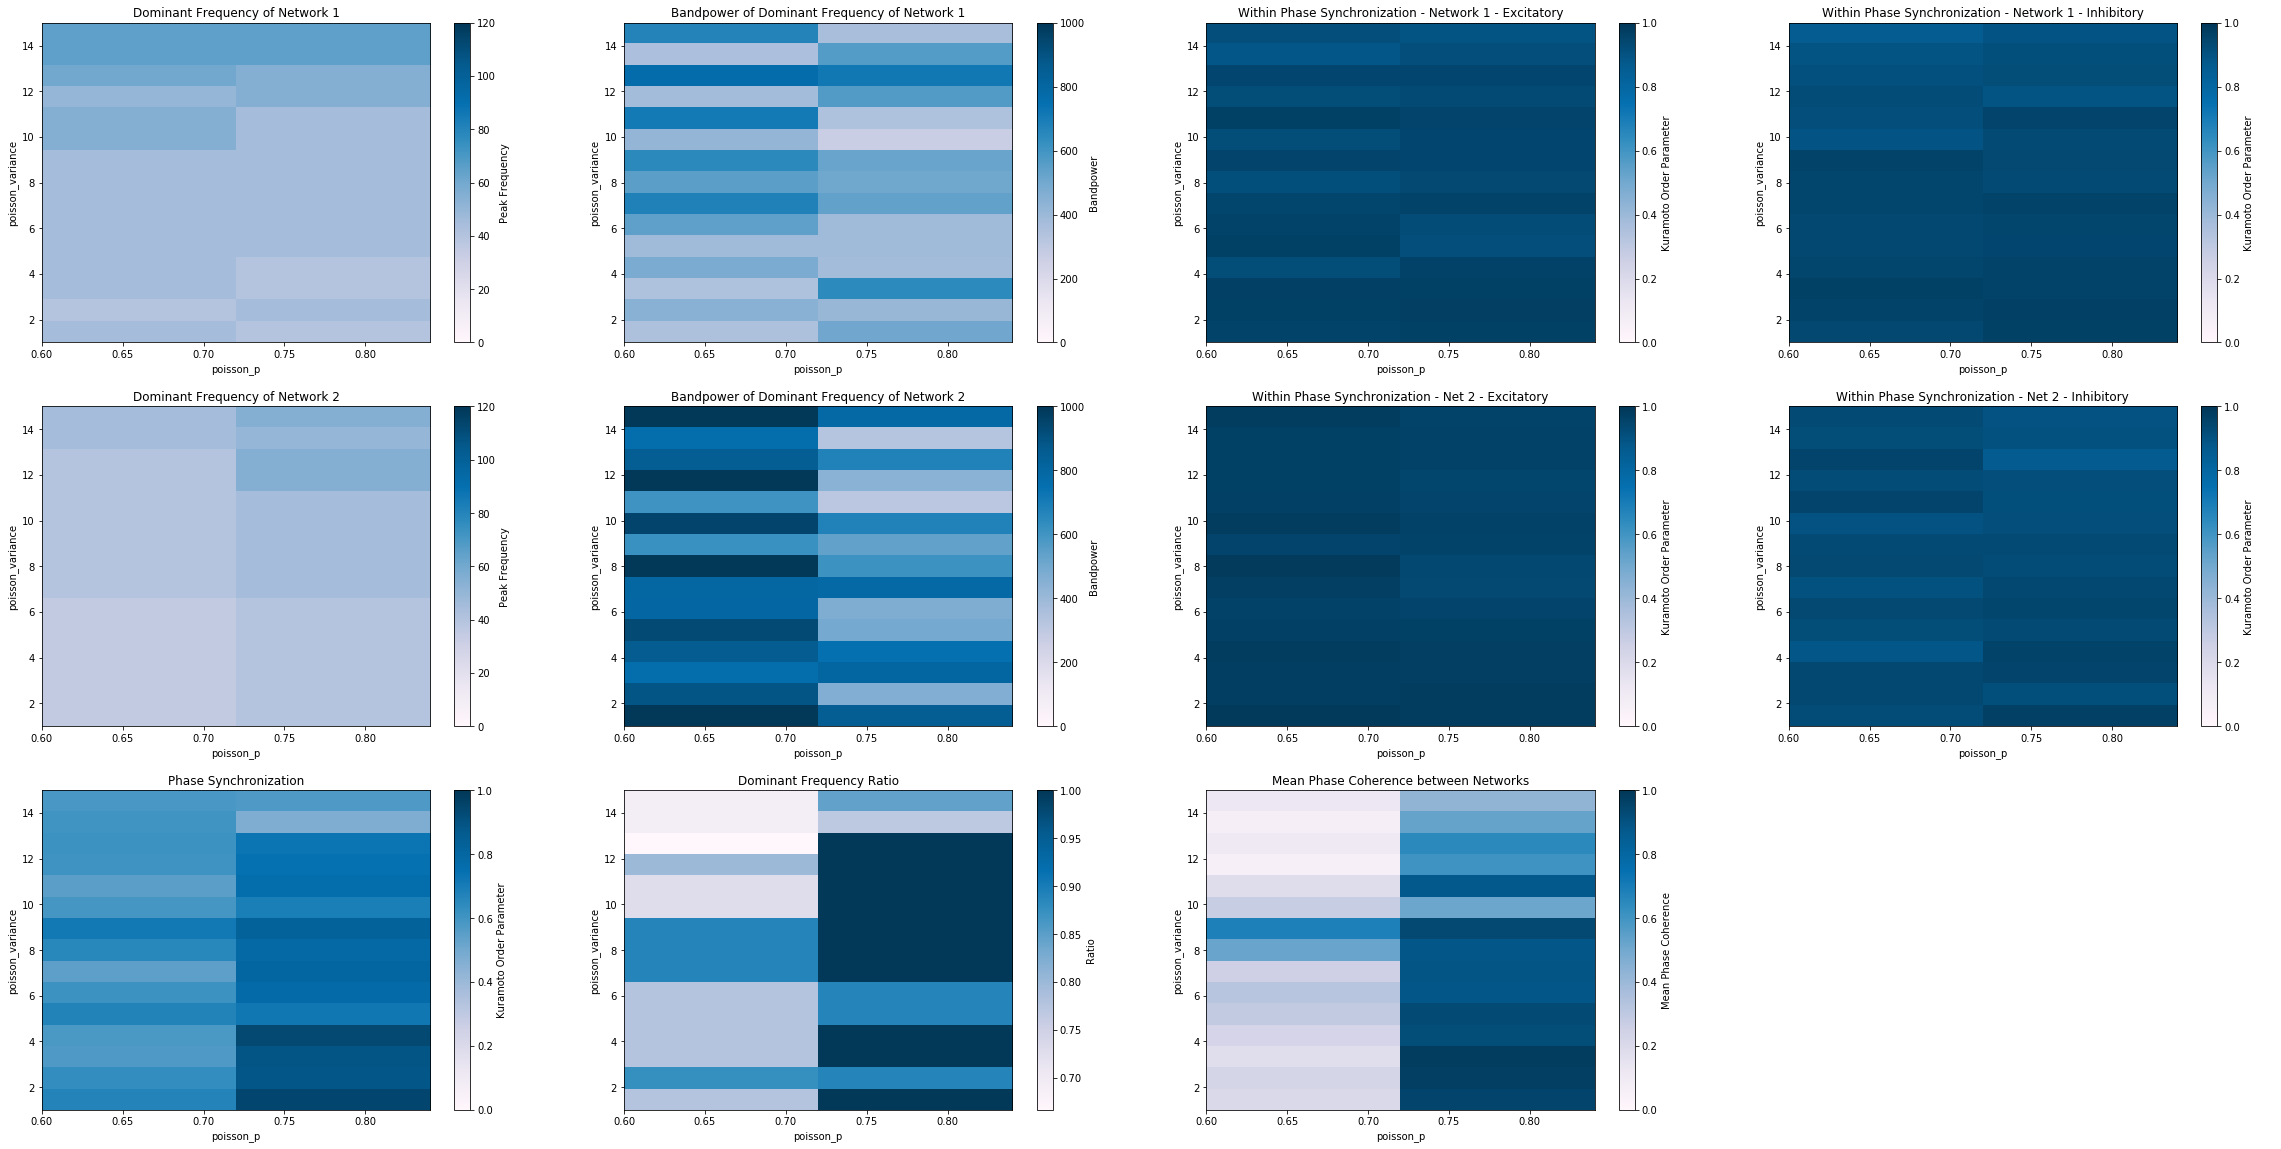

In [55]:
plots.plot_exploration(ex, vmin_ratio=None)